In [1]:
from airfoils import Airfoil
import numpy as np
import urllib.request
import matplotlib.pyplot as plt
import os,sys,getopt
# # Airfoil
# ##### 0 = Read from python module
# ##### 1 = Read from airfoiltools.com
# ##### 2 = load from file

In [2]:
class AirfoilS(Airfoil):
    def __init__(self, upper, lower):
        super().__init__(upper, lower)
        self.airfoil2Selig()
        self.getFromWeb()

    @classmethod
    def NACA(self, naca, n_points=200):
        self.name = naca
        if len(naca) == 4:
            return self.NACA4(naca, n_points)
        else:
            print("ERROR NOT 4 DIGITS")

    def airfoil2Selig(self):
        x_points = np.hstack((self._x_lower[::-1],self._x_upper[1:])).T
        y_points = np.hstack((self._y_lower[::-1],self._y_upper[1:])).T
        self.selig = np.vstack((x_points, y_points))

    def getFromWeb(self):
        link = "https://m-selig.ae.illinois.edu/ads/coord/naca" + self.name + ".dat"
        with urllib.request.urlopen(link) as url:
            s = url.read().decode("UTF-8")
        s = s.split()
        s = s[2:]
        x, y = list(), list()
        for i in range(int(len(s) / 2)):
            x.append(float(s[2 * i]))
            y.append(float(s[2 * i + 1]))
        self.selig2 = np.vstack((x, y))

In [3]:
plot = True
save = False
Airfoiln = '4415'
mode = 0
filen = os.path.join(Airfoiln, Airfoiln)

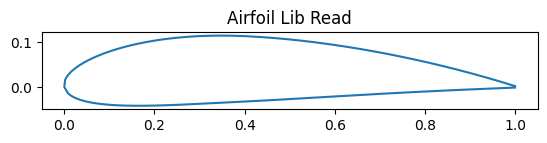

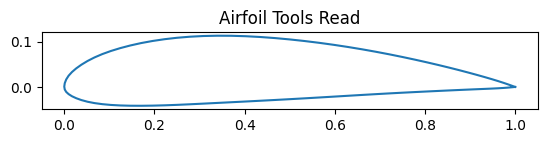

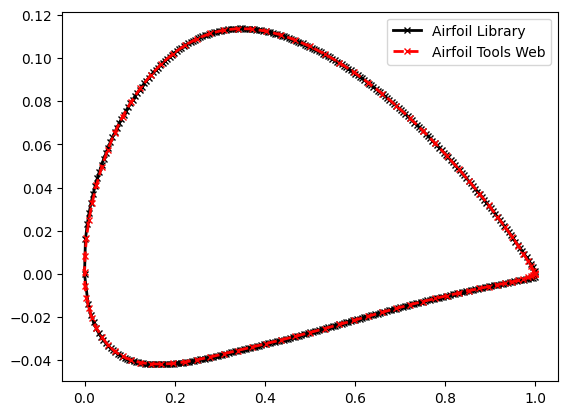

In [7]:
f = AirfoilS.NACA(Airfoiln, n_points= 200)
# # Load from Lib
pt0 = f.selig
# # Load from the web mode 1
# pt1 = np.loadtxt(filen)
# # Fetch from the web mode 2
pt2 = f.selig2

# # Plot
if plot == True:
    plt.plot(*pt0)
    plt.title('Airfoil Lib Read')
    plt.axis("scaled")
    plt.show()

    # plt.plot(*pt1.T)
    # plt.title('Airfoil Files Read')
    # plt.axis("scaled")
    # plt.show()

    plt.plot(*pt2)
    plt.title('Airfoil Tools Read')
    plt.axis("scaled")
    plt.show()

    # Plot all
    plt.plot(*pt0, "-kx", label="Airfoil Library",linewidth=2,markersize=5)
    # plt.plot(*pt1.T, "--bo", label="Airfoil File",linewidth=2,markersize=5)
    plt.plot(*pt2, "--rx", label="Airfoil Tools Web",linewidth=2,markersize=5)
    plt.legend()
    # plt.xscale("log")
    plt.show()

# # Save to file
if save == True:
    if mode == 0:
        np.savetxt(filen, pt0.T)
    # elif mode == 1:
        # np.savetxt(filen, pt1.T)
    elif mode == 2:
        np.savetxt(filen, pt2)
